# Sprint 1 Day 1 - Data Wrangling

*When you are working on data with Python, it makes sense to always begin by importing these packages.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<table><td>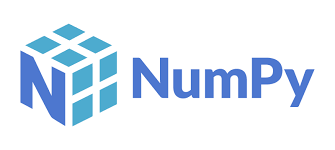</td><td>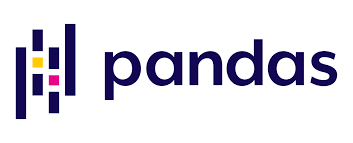</td><tr><td colspan=2>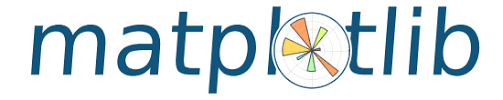</td></table>

***NUMPY*** - "The fundamental package for scientific computing with Python"

***PANDAS*** - "A fast, powerful, flexible and easy to use open source data analysis and manipulation tool"

***Matplotlib*** - "is a comprehensive library for creating static, animated, and interactive visualizations in Python"

## 1. Reading data

In [2]:
## Read data
df = pd.read_csv("schools.csv")

*Data obtained from: https://data.humdata.org/dataset/philippines-education-0-0* 

The most common source of simple data is csv or comma-separated values file. Pandas can read other file types as well such as:
- read_excel
- read_sql
- read_json

The read_csv accepts multiple arguments to read the file better by pressing shift+tab.

## 2. Checking the data

### a. Standard checks
How big is our dataset?

In [3]:
# Check size of dataframe
df.shape

(16022, 17)

How does it look like?

In [4]:
# Check first 5 rows
df.head()

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
0,0,1,NCR,Quezon City,319506,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85,8,Blue,NaN,NCR SECOND DISTRICT,School District I,School with no Annexes,6.0,0.0
1,1,2,NCR,Pasay City,319602,Philippine National School for the Blind,PASAY CITY,Lone,27,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,5.0,0.0
2,2,3,NCR,Pasay City,319603,Philippine School for the Deaf,PASAY CITY,Lone,251,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,25.0,0.0
3,3,4,NCR,Pasay City,223002,Philippine School for the Deaf,PASAY CITY,Lone,260,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,38.0,0.0
4,4,5,NCR,Pasay City,223001,Philippine National School for the Blind,PASAY CITY,Lone,46,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,7.0,2.0


Is it clean until the end?

In [5]:
# Check last 5 rows
df.tail()

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
16017,16017,16018,Region III,Zambales,107013,Mapanao ES,SUBIC,1st,265,3,Red,Asinan Proper,ZAMBALES,Subic,School with no Annexes,3.0,0.0
16018,16018,16019,Region III,Zambales,107007,Calapandayan ES,SUBIC,1st,1187,26,Blue,Calapandayan,ZAMBALES,Subic,School with no Annexes,23.0,1.0
16019,16019,16020,Region III,Zambales,107018,San Isidro ES,SUBIC,1st,793,16,Yellow,San Isidro,ZAMBALES,Subic,School with no Annexes,16.0,0.0
16020,16020,16021,Region III,Zambales,107017,Pamatawan ES,SUBIC,1st,417,14,Blue,Pamatawan,ZAMBALES,Subic,School with no Annexes,11.0,0.0
16021,16021,16022,Region III,Zambales,107014,Matain ES,SUBIC,1st,1885,44,Blue,Matain,ZAMBALES,Subic,School with no Annexes,42.0,1.0


In [6]:
# Check additional info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16022 entries, 0 to 16021
Data columns (total 17 columns):
Unnamed: 0      16022 non-null int64
OBJECTID        16022 non-null int64
Region          16022 non-null object
Division        16022 non-null object
ID              16022 non-null int64
School          16022 non-null object
Municipali      16022 non-null object
Legislativ      16006 non-null object
Total_Enro      16022 non-null int64
Total_Inst      16022 non-null int64
Color_Code      16022 non-null object
Barangay        15287 non-null object
Province        16022 non-null object
District        16022 non-null object
Type_of_Sc      16022 non-null object
Rooms_used      16014 non-null float64
Rooms_unused    16014 non-null float64
dtypes: float64(2), int64(5), object(10)
memory usage: 2.1+ MB


In [7]:
# Check column names
df.columns

Index(['Unnamed: 0', 'OBJECTID', 'Region', 'Division', 'ID', 'School',
       'Municipali', 'Legislativ', 'Total_Enro', 'Total_Inst', 'Color_Code',
       'Barangay', 'Province', 'District', 'Type_of_Sc', 'Rooms_used',
       'Rooms_unused'],
      dtype='object')

In [8]:
# Check data types
df.dtypes

Unnamed: 0        int64
OBJECTID          int64
Region           object
Division         object
ID                int64
School           object
Municipali       object
Legislativ       object
Total_Enro        int64
Total_Inst        int64
Color_Code       object
Barangay         object
Province         object
District         object
Type_of_Sc       object
Rooms_used      float64
Rooms_unused    float64
dtype: object

### b. Checking for errors

1. Check for missing values

In [9]:
## Check missing values
df.isna().sum()

Unnamed: 0        0
OBJECTID          0
Region            0
Division          0
ID                0
School            0
Municipali        0
Legislativ       16
Total_Enro        0
Total_Inst        0
Color_Code        0
Barangay        735
Province          0
District          0
Type_of_Sc        0
Rooms_used        8
Rooms_unused      8
dtype: int64

How do we handle missing values?

2. Checking for duplicates

In [10]:
df["ID"].nunique()

15920

In [11]:
df[df["ID"].duplicated(keep=False)].sort_values(by="ID")

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
11399,11399,11400,Region I,San Fernando City,101026,Ilocanos ES,CITY OF SAN FERNANDO (Capital),1st,746,0,Black,ILOCANOS NORTE,LA UNION,San Fernando I,School with no Annexes,17.0,0.0
11398,11398,11399,Region I,San Fernando City,101026,Ilocanos ES,CITY OF SAN FERNANDO (Capital),1st,746,0,Black,ILOCANOS NORTE,LA UNION,San Fernando I,School with no Annexes,17.0,0.0
9498,9498,9499,Region I,"Pangasinan I, Lingayen",101330,Gayaman ES,BINMALEY,2nd,556,16,Blue,GAYAMAN,PANGASINAN,Binmaley II,School with no Annexes,16.0,1.0
9499,9499,9500,Region I,"Pangasinan I, Lingayen",101330,Gayaman ES,BINMALEY,2nd,556,16,Blue,GAYAMAN,PANGASINAN,Binmaley II,School with no Annexes,16.0,1.0
9517,9517,9518,Region I,"Pangasinan I, Lingayen",101439,Songkoy ES,CALASIAO,3rd,409,13,Blue,SONGKOY,PANGASINAN,Calasiao II,School with no Annexes,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6080,6080,6081,Region IX,Zamboanga del Sur,303773,Dulop NHS - Dumingag Annex,DUMINGAG,1st,1548,24,Red,Lower Landing,ZAMBOANGA DEL SUR,Dumingag I,Annex or Extension school(s),21.0,0.0
144,144,145,Region XI,Tagum City,304261,Tagum National Trade Sschool,CITY OF TAGUM (Capital),1st,1669,43,Blue,Apokon,DAVAO DEL NORTE,Tagum City Central,School with no Annexes,20.0,0.0
169,169,170,Region XI,Tagum City,304261,Tagum National Trade Sschool,CITY OF TAGUM (Capital),1st,1669,43,Blue,Apokon,DAVAO DEL NORTE,Tagum City Central,School with no Annexes,20.0,0.0
297,297,298,Region XI,Davao City,304355,Calinan NHS - Wangan Nat'l. High School,DAVAO CITY,3rd,408,10,Blue,WANGAN,DAVAO DEL SUR,Calinan,School with no Annexes,9.0,0.0


## 3. Selecting data (Slicing)

### a. Slicing by column name
We can choose a column in a dataframe using the syntax `df["column_name"]` or `df.column_name`

In [12]:
df["School"]

0        National Orthopedic Hospital School for Crippl...
1                 Philippine National School for the Blind
2                           Philippine School for the Deaf
3                           Philippine School for the Deaf
4                 Philippine National School for the Blind
                               ...                        
16017                                           Mapanao ES
16018                                      Calapandayan ES
16019                                        San Isidro ES
16020                                         Pamatawan ES
16021                                            Matain ES
Name: School, Length: 16022, dtype: object

In [13]:
df.School

0        National Orthopedic Hospital School for Crippl...
1                 Philippine National School for the Blind
2                           Philippine School for the Deaf
3                           Philippine School for the Deaf
4                 Philippine National School for the Blind
                               ...                        
16017                                           Mapanao ES
16018                                      Calapandayan ES
16019                                        San Isidro ES
16020                                         Pamatawan ES
16021                                            Matain ES
Name: School, Length: 16022, dtype: object

In [14]:
df[["School"]]

,School
0,National Orthopedic Hospital School for Crippl...
1,Philippine National School for the Blind
2,Philippine School for the Deaf
3,Philippine School for the Deaf
4,Philippine National School for the Blind
...,...
16017,Mapanao ES
16018,Calapandayan ES
16019,San Isidro ES
16020,Pamatawan ES


To select more than one column, pass a list of column names.

In [15]:
df[["School", "ID"]]

,School,ID
0,National Orthopedic Hospital School for Crippl...,319506
1,Philippine National School for the Blind,319602
2,Philippine School for the Deaf,319603
3,Philippine School for the Deaf,223002
4,Philippine National School for the Blind,223001
...,...,...
16017,Mapanao ES,107013
16018,Calapandayan ES,107007
16019,San Isidro ES,107018
16020,Pamatawan ES,107017


### b. Slicing by position

To obtain a subset of the dataframe using the position of rows or column, use `.iloc`

In [16]:
df.iloc[:10]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
0,0,1,NCR,Quezon City,319506,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85,8,Blue,NaN,NCR SECOND DISTRICT,School District I,School with no Annexes,6.0,0.0
1,1,2,NCR,Pasay City,319602,Philippine National School for the Blind,PASAY CITY,Lone,27,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,5.0,0.0
2,2,3,NCR,Pasay City,319603,Philippine School for the Deaf,PASAY CITY,Lone,251,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,25.0,0.0
3,3,4,NCR,Pasay City,223002,Philippine School for the Deaf,PASAY CITY,Lone,260,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,38.0,0.0
4,4,5,NCR,Pasay City,223001,Philippine National School for the Blind,PASAY CITY,Lone,46,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,7.0,2.0
5,5,6,NCR,Quezon City,222504,NOH-School for Crippled Children,QUEZON CITY,1st,71,0,Black,NaN,NCR SECOND DISTRICT,School District I,Mother school,6.0,0.0
6,6,7,NCR,Caloocan City,223512,Bagumbong Elementary School Annex,KALOOKAN CITY,1st,1475,14,Red,171,NCR THIRD DISTRICT,Caloocan North IV,Annex or Extension school(s),11.0,0.0
7,7,8,NCR,Caloocan City,223501,Caloocan North ES,KALOOKAN CITY,1st,5919,40,Red,179,NCR THIRD DISTRICT,Caloocan North I,School with no Annexes,44.0,0.0
8,8,9,NCR,Caloocan City,223511,Rene Cayetano ES (Gabriela Silang ES Annex I),KALOOKAN CITY,1st,2708,23,Red,176,NCR THIRD DISTRICT,Caloocan North II,Annex or Extension school(s),24.0,0.0
9,9,10,NCR,Las PiÃ±as City,226502,CAA ES Annex,CITY OF LAS PIÃAS,Lone,1587,14,Red,CAA,NCR FOURTH DISTRICT,Las PiÃ±as City I,Annex or Extension school(s),14.0,0.0


In [17]:
df.iloc[:, :3]

,Unnamed: 0,OBJECTID,Region
0,0,1,NCR
1,1,2,NCR
2,2,3,NCR
3,3,4,NCR
4,4,5,NCR
...,...,...,...
16017,16017,16018,Region III
16018,16018,16019,Region III
16019,16019,16020,Region III
16020,16020,16021,Region III


In [18]:
df.iloc[:4, :5] # Get index 1 to 3 of the dataframe (start inclusive, end exclusive)

,Unnamed: 0,OBJECTID,Region,Division,ID
0,0,1,NCR,Quezon City,319506
1,1,2,NCR,Pasay City,319602
2,2,3,NCR,Pasay City,319603
3,3,4,NCR,Pasay City,223002


#### Practice: Get the first 50 rows and the until Total_Inst column

In [ ]:
# Insert code


### c. Slicing by index name

If you don't know the position by know the index you are looking for, you can use `.loc`.

In [19]:
df.loc[10]

Unnamed: 0                                10
OBJECTID                                  11
Region                                   NCR
Division                     Las PiÃ±as City
ID                                    226503
School             Talon 3 Elementary School
Municipali                CITY OF LAS PIÃAS
Legislativ                              Lone
Total_Enro                              1657
Total_Inst                                 0
Color_Code                             Black
Barangay                                 NaN
Province                 NCR FOURTH DISTRICT
District                  Las PiÃ±as City II
Type_of_Sc      Annex or Extension school(s)
Rooms_used                                17
Rooms_unused                               0
Name: 10, dtype: object

In [20]:
df.loc[:10, :'School']

,Unnamed: 0,OBJECTID,Region,Division,ID,School
0,0,1,NCR,Quezon City,319506,National Orthopedic Hospital School for Crippl...
1,1,2,NCR,Pasay City,319602,Philippine National School for the Blind
2,2,3,NCR,Pasay City,319603,Philippine School for the Deaf
3,3,4,NCR,Pasay City,223002,Philippine School for the Deaf
4,4,5,NCR,Pasay City,223001,Philippine National School for the Blind
5,5,6,NCR,Quezon City,222504,NOH-School for Crippled Children
6,6,7,NCR,Caloocan City,223512,Bagumbong Elementary School Annex
7,7,8,NCR,Caloocan City,223501,Caloocan North ES
8,8,9,NCR,Caloocan City,223511,Rene Cayetano ES (Gabriela Silang ES Annex I)
9,9,10,NCR,Las PiÃ±as City,226502,CAA ES Annex


## 4. Filtering

Filtering allows you to select parts of the dataframe based on cell values.

In [21]:
df["Region"] == "NCR"

0         True
1         True
2         True
3         True
4         True
         ...  
16017    False
16018    False
16019    False
16020    False
16021    False
Name: Region, Length: 16022, dtype: bool

In [22]:
# Returns all rows that is TRUE
df[df["Region"] == "NCR"]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
0,0,1,NCR,Quezon City,319506,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85,8,Blue,NaN,NCR SECOND DISTRICT,School District I,School with no Annexes,6.0,0.0
1,1,2,NCR,Pasay City,319602,Philippine National School for the Blind,PASAY CITY,Lone,27,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,5.0,0.0
2,2,3,NCR,Pasay City,319603,Philippine School for the Deaf,PASAY CITY,Lone,251,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,25.0,0.0
3,3,4,NCR,Pasay City,223002,Philippine School for the Deaf,PASAY CITY,Lone,260,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,38.0,0.0
4,4,5,NCR,Pasay City,223001,Philippine National School for the Blind,PASAY CITY,Lone,46,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14079,14079,14080,NCR,Valenzuela City,136818,Punturin ES,CITY OF VALENZUELA,1st,1436,11,Red,Punturin,NCR THIRD DISTRICT,Valenzuela City Central District,Mother school,11.0,0.0
14080,14080,14081,NCR,Valenzuela City,136798,Maysan ES,CITY OF VALENZUELA,2nd,2241,22,Red,Maysan,NCR THIRD DISTRICT,Valenzuela City East District,School with no Annexes,23.0,0.0
14081,14081,14082,NCR,Valenzuela City,136816,Mapulang Lupa ES,CITY OF VALENZUELA,2nd,3199,31,Red,Mapulang Lupa,NCR THIRD DISTRICT,Valenzuela City East District,School with no Annexes,26.0,0.0
14082,14082,14083,NCR,Valenzuela City,136817,Paso de Blas ES,CITY OF VALENZUELA,2nd,1190,13,Red,Paso de Blas,NCR THIRD DISTRICT,Valenzuela City East District,School with no Annexes,16.0,1.0


In [23]:
df[(df["Region"] == "NCR") & (df["Color_Code"] == "Blue")]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
0,0,1,NCR,Quezon City,319506,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85,8,Blue,NaN,NCR SECOND DISTRICT,School District I,School with no Annexes,6.0,0.0
1,1,2,NCR,Pasay City,319602,Philippine National School for the Blind,PASAY CITY,Lone,27,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,5.0,0.0
2,2,3,NCR,Pasay City,319603,Philippine School for the Deaf,PASAY CITY,Lone,251,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,25.0,0.0
3,3,4,NCR,Pasay City,223002,Philippine School for the Deaf,PASAY CITY,Lone,260,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,38.0,0.0
4,4,5,NCR,Pasay City,223001,Philippine National School for the Blind,PASAY CITY,Lone,46,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14001,14001,14002,NCR,City of San Juan,136751,Pinaglabanan ES,CITY OF SAN JUAN,Lone,1912,52,Blue,Isabelita,NCR SECOND DISTRICT,San Juan District II,School with no Annexes,49.0,0.0
14023,14023,14024,NCR,Taguig,320604,"Sen. Renato ""Companero"" Cayetano Mem. Sci. & T...",TAGUIG CITY,1st,510,22,Blue,"PDS, USUSAN",NCR FOURTH DISTRICT,Taguig District I,School with no Annexes,17.0,0.0
14024,14024,14025,NCR,Taguig,305460,Taguig National High School,TAGUIG CITY,1st,2001,59,Blue,LOWER BICUTAN,NCR FOURTH DISTRICT,Taguig District I,School with no Annexes,40.0,0.0
14043,14043,14044,NCR,Valenzuela City,320401,Valenzuela City Science HS,CITY OF VALENZUELA,1st,465,15,Blue,Dalandanan,NCR THIRD DISTRICT,Valenzuela City Central District,School with no Annexes,12.0,0.0


#### Practice: Get all schools that are Black color coded or have 0 teachers


In [80]:
# Insert code
df[(df["Color_Code"]=="Black")]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
5,5,6,NCR,Quezon City,222504,NOH-School for Crippled Children,QUEZON CITY,1st,71,0,Black,NaN,NCR SECOND DISTRICT,School District I,Mother school,6.0,0.0
10,10,11,NCR,Las PiÃ±as City,226503,Talon 3 Elementary School,CITY OF LAS PIÃAS,Lone,1657,0,Black,NaN,NCR FOURTH DISTRICT,Las PiÃ±as City II,Annex or Extension school(s),17.0,0.0
50,50,51,NCR,Las PiÃ±as City,320305,T. S. Cruz High School,CITY OF LAS PIÃAS,Lone,1859,0,Black,NaN,NCR FOURTH DISTRICT,Las PiÃ±as City II,School with no Annexes,17.0,0.0
52,52,53,NCR,Malabon City,320505,Catmon IS,CITY OF MALABON,Lone,422,0,Black,Catmon,NCR THIRD DISTRICT,Malabon District V,School with no Annexes,6.0,0.0
53,53,54,NCR,Malabon City,320506,Col. Ramon Camus IS,CITY OF MALABON,Lone,312,0,Black,San Agustin,NCR THIRD DISTRICT,Malabon District III,School with no Annexes,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12006,12006,12007,Region II,Isabela,155513,San Rafael Alto PS,SANTO TOMAS,1st,43,0,Black,SAN RAFAEL ALTO,ISABELA,Sto. Tomas,School with no Annexes,3.0,0.0
12051,12051,12052,Region II,Isabela,300594,San Mariano HS - Bitabian Annex,SAN MARIANO,2nd,218,0,Black,BITABIAN,ISABELA,Alicia North,Annex or Extension school(s),5.0,0.0
12174,12174,12175,Region III,Bulacan,104739,Dr. G. Dela Merced,BALIUAG,2nd,679,0,Black,BARANGCA,BULACAN,Baliuag North,School with no Annexes,16.0,0.0
13129,13129,13130,Region XI,Davao del Norte,128575,Katipunan ES,ASUNCION (SAUG),1st,599,0,Black,DOÑA ANDREA,DAVAO DEL NORTE,Asuncion,School with no Annexes,15.0,3.0


You can also use string methods such as `contains` to find items

In [28]:
# Applies boolean to all rows
df[df["Municipali"].str.contains("CITY")]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
0,0,1,NCR,Quezon City,319506,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85,8,Blue,NaN,NCR SECOND DISTRICT,School District I,School with no Annexes,6.0,0.0
1,1,2,NCR,Pasay City,319602,Philippine National School for the Blind,PASAY CITY,Lone,27,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,5.0,0.0
2,2,3,NCR,Pasay City,319603,Philippine School for the Deaf,PASAY CITY,Lone,251,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,25.0,0.0
3,3,4,NCR,Pasay City,223002,Philippine School for the Deaf,PASAY CITY,Lone,260,84,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,38.0,0.0
4,4,5,NCR,Pasay City,223001,Philippine National School for the Blind,PASAY CITY,Lone,46,9,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,15913,15914,Region III,Tarlac City,106772,Tarlac West CES,CITY OF TARLAC (Capital),2nd,2435,62,Blue,San Roque,TARLAC,Tarlac West,School with no Annexes,68.0,0.0
15914,15914,15915,Region III,Tarlac City,106765,San Pablo ES,CITY OF TARLAC (Capital),2nd,425,10,Blue,SAN PABLO,TARLAC,Tarlac West,School with no Annexes,11.0,0.0
15915,15915,15916,Region III,Tarlac City,106752,Bacuit ES,CITY OF TARLAC (Capital),2nd,397,9,Blue,Tibag,TARLAC,Tarlac West,School with no Annexes,11.0,0.0
15916,15916,15917,Region III,Tarlac City,106769,Sapang Maragul ES,CITY OF TARLAC (Capital),2nd,675,17,Blue,Sapang Maragul,TARLAC,Tarlac West,School with no Annexes,15.0,0.0


#### Practice: Get all schools that have ES in its name

In [30]:
# Insert code
df[df["School"].str.contains("ES")]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
126,126,127,Region XI,Davao Oriental,129377,BLISS ES,CITY OF MATI (Capital),2nd,540,14,Blue,Sainz,DAVAO ORIENTAL,Mati Central,School with no Annexes,13.0,0.0
191,191,192,CARAGA,Surigao del Sur,317921,Wakat ISS,BAROBO,2nd,169,0,Black,Wakat,SURIGAO DEL SUR,Barobo I,School with no Annexes,2.0,0.0
6962,6962,6963,CARAGA,Surigao del Sur,304874,Palasao ISS (Cantilan NHS - Palasao NHS Annex)rr,CANTILAN,1st,113,2,Red,Palasao,SURIGAO DEL SUR,Cantilan I,School with no Annexes,2.0,0.0
6970,6970,6971,CARAGA,Surigao del Sur,304876,Esperanza ISS (Carmen Nat'l. Agr'l. HS - Esper...,CARMEN,1st,210,6,Blue,Esperanza,SURIGAO DEL SUR,Carmen,Mother school,0.0,0.0
11146,11146,11147,CARAGA,Surigao del Sur,317920,Bitaugan ISS,CAGWAIT,1st,110,0,Black,Bitaugan East,SURIGAO DEL SUR,Cagwait,School with no Annexes,4.0,0.0
11147,11147,11148,CARAGA,Surigao del Sur,317926,Tarusan ISS,HINATUAN,2nd,67,0,Black,Tarusan,SURIGAO DEL SUR,Hinatuan North,School with no Annexes,1.0,0.0
11174,11174,11175,CARAGA,Surigao del Sur,317902,Pakwan ISS (F.H. Irizari Memorial NHS - Pakwan...,LANUZA,1st,85,4,Blue,Pakwan Annex,SURIGAO DEL SUR,Lanuza,School with no Annexes,4.0,0.0
13707,13707,13708,NCR,Marikina City,136685,SSS Village ES,CITY OF MARIKINA,2nd,2870,29,Red,Concepcion Dos,NCR SECOND DISTRICT,Marikina City District II,School with no Annexes,31.0,0.0
14309,14309,14310,Region IV-A,Cavite,108100,BLISS Elementary School,SILANG,5th,425,9,Yellow,Biga II,CAVITE,Silang I,School with no Annexes,2.0,0.0
15113,15113,15114,Region IV-A,Lucena City,109729,BLISS ES,LUCENA CITY (Capital),2nd,395,11,Blue,Mayao Crossing,QUEZON,Lucena South District,School with no Annexes,11.0,0.0


#### Practice: Get all schools that have ES in its name in NCR

In [32]:
# Insert code
df[(df["School"].str.contains("ES")) & (df["Region"]=="NCR")]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
7,7,8,NCR,Caloocan City,223501,Caloocan North ES,KALOOKAN CITY,1st,5919,40,Red,179,NCR THIRD DISTRICT,Caloocan North I,School with no Annexes,44.0,0.0
8,8,9,NCR,Caloocan City,223511,Rene Cayetano ES (Gabriela Silang ES Annex I),KALOOKAN CITY,1st,2708,23,Red,176,NCR THIRD DISTRICT,Caloocan North II,Annex or Extension school(s),24.0,0.0
9,9,10,NCR,Las PiÃ±as City,226502,CAA ES Annex,CITY OF LAS PIÃAS,Lone,1587,14,Red,CAA,NCR FOURTH DISTRICT,Las PiÃ±as City I,Annex or Extension school(s),14.0,0.0
11,11,12,NCR,Malabon City,136852,Acacia ES,CITY OF MALABON,Lone,2681,22,Red,Acacia,NCR THIRD DISTRICT,Malabon District V,School with no Annexes,24.0,0.0
12,12,13,NCR,Malabon City,136838,TaÃ±ong ES I,CITY OF MALABON,Lone,1223,13,Red,Tañong,NCR THIRD DISTRICT,Malabon District II,School with no Annexes,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14079,14079,14080,NCR,Valenzuela City,136818,Punturin ES,CITY OF VALENZUELA,1st,1436,11,Red,Punturin,NCR THIRD DISTRICT,Valenzuela City Central District,Mother school,11.0,0.0
14080,14080,14081,NCR,Valenzuela City,136798,Maysan ES,CITY OF VALENZUELA,2nd,2241,22,Red,Maysan,NCR THIRD DISTRICT,Valenzuela City East District,School with no Annexes,23.0,0.0
14081,14081,14082,NCR,Valenzuela City,136816,Mapulang Lupa ES,CITY OF VALENZUELA,2nd,3199,31,Red,Mapulang Lupa,NCR THIRD DISTRICT,Valenzuela City East District,School with no Annexes,26.0,0.0
14082,14082,14083,NCR,Valenzuela City,136817,Paso de Blas ES,CITY OF VALENZUELA,2nd,1190,13,Red,Paso de Blas,NCR THIRD DISTRICT,Valenzuela City East District,School with no Annexes,16.0,1.0


#### Practice: Get all schools that has greater than 2000 enrollees or is a Mother school

In [34]:
# Insert code
df[(df["Total_Enro"] > 2000) | (df["Type_of_Sc"]=="Mother school")]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
5,5,6,NCR,Quezon City,222504,NOH-School for Crippled Children,QUEZON CITY,1st,71,0,Black,NaN,NCR SECOND DISTRICT,School District I,Mother school,6.0,0.0
7,7,8,NCR,Caloocan City,223501,Caloocan North ES,KALOOKAN CITY,1st,5919,40,Red,179,NCR THIRD DISTRICT,Caloocan North I,School with no Annexes,44.0,0.0
8,8,9,NCR,Caloocan City,223511,Rene Cayetano ES (Gabriela Silang ES Annex I),KALOOKAN CITY,1st,2708,23,Red,176,NCR THIRD DISTRICT,Caloocan North II,Annex or Extension school(s),24.0,0.0
11,11,12,NCR,Malabon City,136852,Acacia ES,CITY OF MALABON,Lone,2681,22,Red,Acacia,NCR THIRD DISTRICT,Malabon District V,School with no Annexes,24.0,0.0
13,13,14,NCR,Malabon City,136850,Tinajeros ES,CITY OF MALABON,Lone,3347,30,Red,Tinajeros,NCR THIRD DISTRICT,Malabon District IV,School with no Annexes,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,15985,15986,Region III,Zambales,301021,Gov Manuel Barretto National High School,SAN FELIPE,2nd,523,20,Blue,Maloma,ZAMBALES,San Felipe,Mother school,13.0,0.0
16008,16008,16009,Region III,Zambales,301033,Sta. Cruz NHS,SANTA CRUZ,2nd,639,18,Blue,Malabago,ZAMBALES,Sta. Cruz North,Mother school,15.0,0.0
16012,16012,16013,Region III,Zambales,301036,Subic National High School,SUBIC,1st,3490,40,Red,Mangan-Vaca,ZAMBALES,Subic,Mother school,42.0,0.0
16013,16013,16014,Region III,Zambales,107012,Manggahan ES,SUBIC,1st,610,11,Gold,Mangan-Vaca,ZAMBALES,Subic,Mother school,11.0,0.0


## 5.   Grouping and Aggregation

Grouping and aggregation are critical components of data analysis which involve:

- **Splitting** data into groups based on some features.
- **Applying** a function to each group independently.
- **Combining** the result into data structure.

#### a. Value counts
- specifies the number of entries per item in the column

In [50]:
df["Region"].value_counts()

Region VIII    1976
Region I       1473
Region VI      1453
CAR            1327
Region IV-A    1231
Region IX      1153
Region III     1114
Region V       1081
CARAGA         1006
Region VII      926
Region XII      837
NCR             762
Region XI       641
Region IV-B     417
Region II       362
Region X        202
ARMM             61
Name: Region, dtype: int64

- we can sort the results using `sort_values`

In [51]:
df["Region"].value_counts().sort_values()

ARMM             61
Region X        202
Region II       362
Region IV-B     417
Region XI       641
NCR             762
Region XII      837
Region VII      926
CARAGA         1006
Region V       1081
Region III     1114
Region IX      1153
Region IV-A    1231
CAR            1327
Region VI      1453
Region I       1473
Region VIII    1976
Name: Region, dtype: int64

- to sort in descending order, just add `ascending=False` as argument

In [52]:
df["Region"].value_counts().sort_values(ascending=False)

Region VIII    1976
Region I       1473
Region VI      1453
CAR            1327
Region IV-A    1231
Region IX      1153
Region III     1114
Region V       1081
CARAGA         1006
Region VII      926
Region XII      837
NCR             762
Region XI       641
Region IV-B     417
Region II       362
Region X        202
ARMM             61
Name: Region, dtype: int64

#### b. Groupby

- `.size` returns the count of rows
- It can also accept multiple columns

In [44]:
df.groupby(["Region"]).size()

Region
ARMM             61
CAR            1327
CARAGA         1006
NCR             762
Region I       1473
Region II       362
Region III     1114
Region IV-A    1231
Region IV-B     417
Region IX      1153
Region V       1081
Region VI      1453
Region VII      926
Region VIII    1976
Region X        202
Region XI       641
Region XII      837
dtype: int64

How many schools per color for each region?

In [45]:
df.groupby(["Region", "Color_Code"]).size()

Region      Color_Code
ARMM        Black           2
            Blue           18
            Gold            6
            Red            27
            Yellow          8
                         ... 
Region XII  Black          11
            Blue          540
            Gold           51
            Red           161
            Yellow         74
Length: 82, dtype: int64

We can apply another column in brackets after groupby to indicate which column to aggregate.

In [38]:
df.groupby("Region")["Total_Enro"].sum()

Region
ARMM             47159
CAR             198672
CARAGA          351872
NCR            1933185
Region I        633705
Region II       144916
Region III      860652
Region IV-A    1381006
Region IV-B     183110
Region IX       293848
Region V        487258
Region VI       628397
Region VII      458604
Region VIII     557787
Region X        206608
Region XI       530372
Region XII      420471
Name: Total_Enro, dtype: int64

#### Practice: Group the sum of count of teachers based on color code

In [43]:
# Insert code here



We can have multiple columns to aggregate. These columns can either be aggregated with the same function or with different functions.

In [46]:
df.groupby(["Region"])[["Total_Enro", "Total_Inst"]].sum()

,Total_Enro,Total_Inst
Region,,
ARMM,47159,812
CAR,198672,7081
CARAGA,351872,8922
NCR,1933185,25353
Region I,633705,18202
Region II,144916,4570
Region III,860652,20163
Region IV-A,1381006,24123
Region IV-B,183110,4927


Now that we have two coloumns, if we wish to sort them, we need to add `by` as an argument in sort_values

In [53]:
df.groupby(["Region"])[["Total_Enro", "Total_Inst"]].sum().sort_values(by="Total_Enro")

,Total_Enro,Total_Inst
Region,,
ARMM,47159,812
Region II,144916,4570
Region IV-B,183110,4927
CAR,198672,7081
Region X,206608,4051
Region IX,293848,8793
CARAGA,351872,8922
Region XII,420471,9418
Region VII,458604,10625


the aggregated funtion uses the syntax: 
`.agg(new_column_name=(old_column_name, function))`

In [48]:
df.groupby(["Region"])[["Total_Enro", "Total_Inst"]].agg(Enrolled=("Total_Enro", sum), Teacher=("Total_Inst", max))

,Enrolled,Teacher
Region,,
ARMM,47159,99
CAR,198672,132
CARAGA,351872,96
NCR,1933185,236
Region I,633705,118
Region II,144916,73
Region III,860652,169
Region IV-A,1381006,145
Region IV-B,183110,113


## Exercise

Answer the following:

1. Which division has the most number of schools?

In [56]:
# Insert code here
df.groupby("Division").size().sort_values(ascending=False)

Division
Leyte                 1214
Zamboanga del Sur      712
North Cotabato         654
Masbate                613
Negros Oriental        505
                      ... 
Sulu I                   1
Lanao del Sur - IA       1
Ozamis City              1
Quirino                  1
Dipolog City             1
Length: 192, dtype: int64

2. Which school has the fewest number of enrolles and which province does this school belong to?

In [66]:
# Insert code here
df[df["Total_Enro"] == df["Total_Enro"].min()]

,Unnamed: 0,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,Rooms_used,Rooms_unused
8130,8130,8131,Region VIII,Eastern Samar,122678,Cantinio PS,QUINAPONDAN,Lone,6,1,Blue,NaN,EASTERN SAMAR,Quinapundan,School with no Annexes,1.0,0.0
8387,8387,8388,CAR,Abra,135052,Binasaran PS,MALIBCONG,Lone,6,1,Blue,BINASARAN,ABRA,Malibcong,School with no Annexes,0.0,0.0


3. Among the schools in ARMM, which municipality has the fewest total number of teachers?

In [77]:
# Insert code here
df[df["Region"]=="ARMM"].groupby("Municipali")["Total_Inst"].sum().sort_values()

Municipali
SITANGKAI                       0
LANTAWAN                        0
BALABAGAN                       2
BUADIPOSO-BUNTONG               2
POONA BAYABAO (GATA)            6
TUBURAN                         6
TUGAYA                          6
BUBONG                          6
MALUSO                          7
MAIMBUNG                        7
BALINDONG (WATU)                7
KABUNTALAN (TUMBAO)             8
KALINGALAN CALUANG              8
SULTAN MASTURA                  8
LUMBATAN                       12
BAYANG                         12
PIAGAPO                        13
MALABANG                       14
PUALAS                         15
TALAYAN                        17
GANASSI                        18
SIMUNUL                        22
BONGAO                         23
BUTIG                          24
TIPO-TIPO                      25
SULTAN KUDARAT (NULING)        25
MAROGONG                       28
SAGUIARAN                      28
MARANTAO                       41
PAR